# Chapter 1 Exercises
# 
We approach this notebook following the textbook content, as available in the notes.md markdown file. 

# Manifolds

For convenience, we restate the definition here:
### **Definition 1.1** - **$M$-Dimensional Manifold**
An **$m$-dimensional manifold** is a set **$M$**, together with a countable collection of subsets **$U_{\alpha} \sub M$**, called ***coordinate charts***, and one-to-one functions **$\Chi_\alpha \colon U_\alpha \mapsto V_\alpha$** onto connected oopen subsets **$V_{\alpha}\sub \R^m$**, called ***local coordinate maps***, which satisfy the following properties:

*a)* The ***coordinate*** charts *cover* **$M$**:
$$\bigcup_{\alpha} U_{\alpha} = M$$

*b)* On the overlap of any pair of coordinate charts, $U_{\alpha}\cap U_{\beta}$ the composite map
$$
\chi_{\beta}\circ \chi_{\alpha}^{-1}\colon \chi_{\alpha}(
    U_{\alpha}\cap U_{\beta}
) \mapsto \chi_{\beta}(
    U_{\alpha}\cap U_{\beta}
)
$$

is a smooth (***inifinitely differentiable***) function.

*c)* If $x \in U_{\alpha}$ and $\tilde x \in U_{\beta}$ are distinct points of **$M$**, then there exists open subsets $W\sub V_{\alpha}$, $\tilde W \sub V_{\beta}$ with $\chi_{\alpha}(x)\in W$, $\chi_{\beta}(\tilde x)\in \tilde W$, satisfying
$$
\chi_{\alpha}^{-1}(W)\cap\chi_{\beta}^{-1}(\tilde W) = \emptyset
$$

We'll proceed with some simple examples based on Definition 1.1, which will help us gain a deeper understanding of manifolds and their properties.

## Example 1: $S^{1}, S^{2}$, and $S^{3}$

### $S^{1} = \{(x, y)\colon x^2 + y^2 = 1\}$


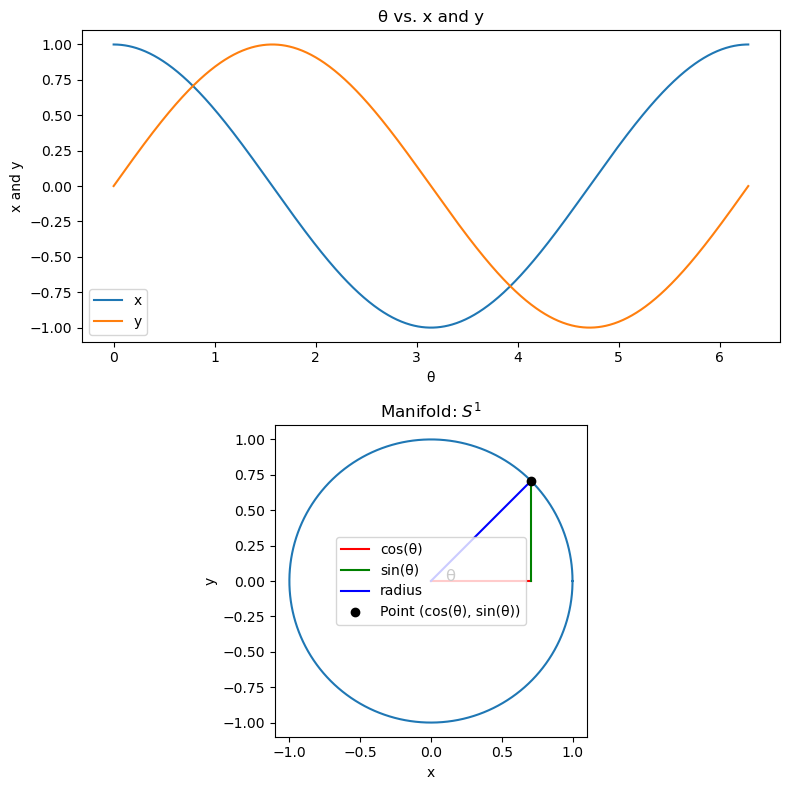

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

import torch.optim as optim

import io
import zipfile
import requests
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader

# An easy example to start with to explore the definition of a manifold is S^1, the circle. We can parameterize the circle
# such that it can be defined in terms of a single parameter, theta, as follows:
# x = cos(theta)
# y = sin(theta)

# The circle is a 1-dimensional manifold, so we can define it as a
# 1-dimensional tensor. We'll use 1000 points to define the circle.
theta = torch.linspace(0, 2 * torch.pi, 1000)
x = torch.cos(theta)
y = torch.sin(theta)

# Create a figure with two subplots: x and y as functions of theta, and x plotted against y with an example right triangle
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot x and y as functions of theta
axs[0].plot(theta, x, label='x')
axs[0].plot(theta, y, label='y')
axs[0].set_title('\u03B8 vs. x and y')
axs[0].set_xlabel('\u03B8')
axs[0].set_ylabel('x and y')
axs[0].legend()

# Plot x vs y and the right triangle with the corresponding angle 
axs[1].plot(x, y)
axs[1].set_title('Manifold: $S^1$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Select the point attheta = pi/4 and plot the triangle
example_theta = torch.tensor(torch.pi / 4.0)
example_x = torch.cos(example_theta)
example_y = torch.sin(example_theta)

axs[1].plot([0, example_x], [0, 0], 'r',label='cos(\u03B8)')                                      # x edge
axs[1].plot([example_x, example_x], [0, example_y], 'g', label='sin(\u03B8)')                                      # y edge
axs[1].plot([0, example_x], [0, example_y], 'b', label='radius')                                  # hypotenuse
axs[1].plot(example_x, example_y, 'ko', label='Point (cos(\u03B8), sin(\u03B8))')                 # point
axs[1].annotate('\u03B8', (0.1, 0), fontsize=12)                                                   # theta label
axs[1].legend()

# Set aspect ratio for the x vs y plot
axs[1].set_aspect('equal', 'box')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


### $S^2 = \{(x, y, z)\colon x^2 + y^2 + z^2\ = 1\}$

In [2]:
# S^2 is a good example of a nontrivial two-dimensional manifold,
# realized as a surface in three-dimensional space.

# Let'a define this in terms of the subsets U_1 and U_2, which cover S^2.
# U_1 is the upper hemisphere, and U_2 is the lower hemisphere.
# We can define these subsets in terms of the following coordinate charts:
# S2 = { (x, y, z) in R^3 | x^2 + y^2 + z^2 = 1 }
# U_1 = S^2 \ { (0, 0, 1) }
# U_2 = S^2 \ { (0, 0, -1) }

tolerance = 1e-2
S2 = torch.tensor([[x.item(), y.item(), z.item()] for x in torch.linspace(-1, 1, 50) for y in torch.linspace(-1, 1, 50) for z in torch.linspace(-1, 1, 50) if abs(x**2 + y**2 + z**2 - 1.0) < tolerance ])


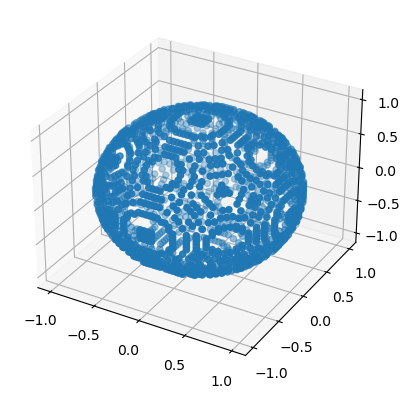

In [3]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S2[:, 0], S2[:, 1], S2[:, 2]);
plt.show()


In [4]:
# Now we define the coordinate charts for U_1 and U_2.

# U_1 = { (x, y, z) in S^2 | z != 1 }
# U_2 = { (x, y, z) in S^2 | z != -1 }

U1 = torch.tensor([[x.item(), y.item(), z.item()] for x in torch.linspace(-1, 1, 50) for y in torch.linspace(-1, 1, 50) for z in torch.linspace(-1, 1, 50) if abs(x**2 + y**2 + z**2 - 1.0) < tolerance and abs(z - 1.0) > tolerance])
U2 = torch.tensor([[x.item(), y.item(), z.item()] for x in torch.linspace(-1, 1, 50) for y in torch.linspace(-1, 1, 50) for z in torch.linspace(-1, 1, 50) if abs(x**2 + y**2 + z**2 - 1.0) < tolerance and abs(z + 1.0) > tolerance])


In [5]:
# Check that U_1 and U_2 are subsets of S^2.
torch.allclose(U1.norm(dim=1), torch.ones(len(U1)), atol=tolerance)

True

In [6]:
torch.allclose(U2.norm(dim=1), torch.ones(len(U2)), atol=tolerance)

True

In [7]:
U1 = S2[S2[:, 2] > -tolerance]
U2 = S2[S2[:, 2] < tolerance]

# Combine U1 and U2
U_combined = torch.cat([U1, U2], dim=0)

# Check if all points in S2 are covered by U1 and U2
is_covered = torch.allclose(S2, U_combined, atol=tolerance)

print("U1 and U2 cover S^2:", is_covered)

U1 and U2 cover S^2: False


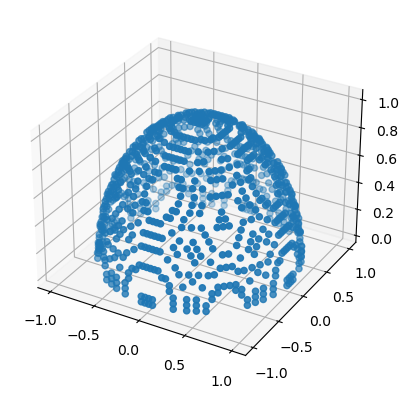

In [8]:

# We can plot the subsets U_1 and U_2 using the Axes3D class from the mpl_toolkits.mplot3d library.


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U1[:, 0], U1[:, 1], U1[:, 2]);
plt.show();



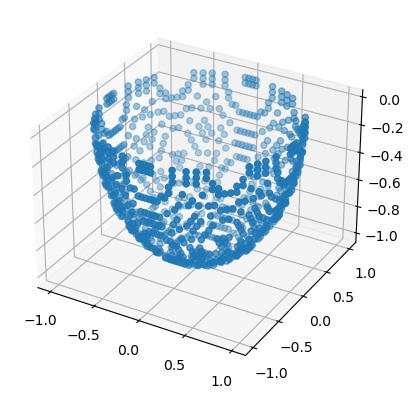

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U2[:, 0], U2[:, 1], U2[:, 2]);
plt.show();


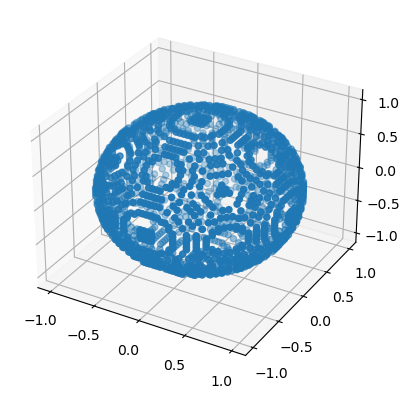

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torch.cat([U1[:, 0],U2[:, 0]]), torch.cat([U1[:, 1],U2[:, 1]]), torch.cat([U1[:, 2],U2[:, 2]]));
plt.show();

We have succesfully shown requirement *(a)* is satisfied by U1 and U2. Now, we need to check the local coordinate maps for U1 and U2, in particular, for each of them, we need to check whether on the overlap of any pair of coordinate charts, $U_{\alpha}\cap U_{\beta}$ the composite map
$$
\chi_{\beta}\circ \chi_{\alpha}^{-1}\colon \chi_{\alpha}(
    U_{\alpha}\cap U_{\beta}
) \mapsto \chi_{\beta}(
    U_{\alpha}\cap U_{\beta}
)
$$

is a smooth (***inifinitely differentiable***) function. 

So first, we need to define the local coordinate maps $\chi_{\alpha}$ and $\chi_{\beta}$.

In [11]:
# We define the coordinate charts for U_1 and U_2 as follows:
# Let chi_alpha: U_alpha -> R^2 ~= {(x, y, 0)}, alpha = 1, 2
# be stereographic projections from the north and south poles, respectively.
# Then chi_1 is given by:
# chi_1(x, y, z) = (x / (1 - z), y / (1 - z))
# and chi_2 is given by:
# chi_2(x, y, z) = (x / (1 + z), y / (1 + z))

# We can define these coordinate charts as functions in Python.
def chi_alpha(U: torch.Tensor, sign: int = [-1, 1]) -> torch.Tensor:
    x, y, z = U[:, 0], U[:, 1], U[:, 2]
    return torch.stack([x / (1 + sign * z), y / (1 + sign * z)], dim=1)

chi_1 = chi_alpha(U1, sign=-1)
chi_2 = chi_alpha(U2, sign=1)

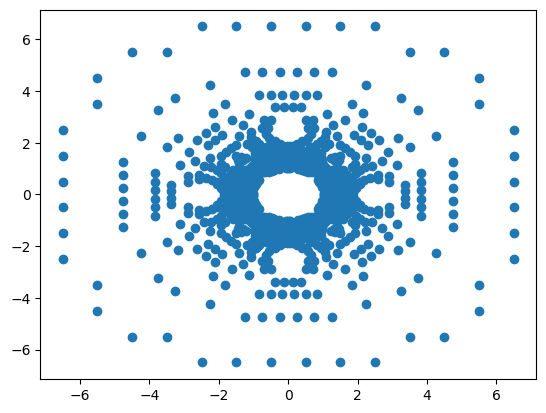

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(chi_1[:, 0], chi_1[:, 1]);
plt.show();

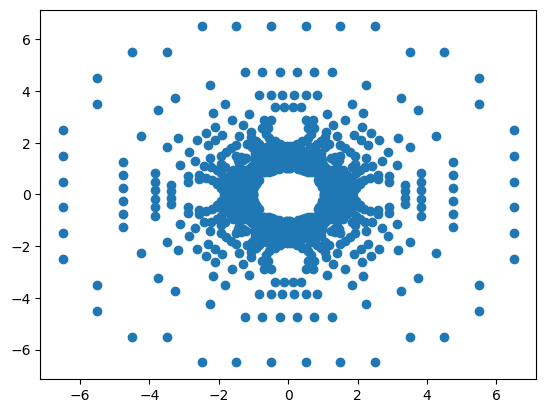

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(chi_2[:, 0], chi_2[:, 1]);
plt.show();

The local coordinate maps for the sphere $S^2$ can be defined using spherical coordinates. For a point $p = (x, y, z)$ on the sphere, we can define the local coordinate maps $\chi_{\alpha}$ and $\chi_{\beta}$ as follows:

$$
\chi_{\alpha}(p) = (\theta, \phi) = (\arctan(y/x), \arccos(z))
$$

$$
\chi_{\beta}(p) = (\theta', \phi') = (\arctan(y/x), \pi - \arccos(z))
$$

where $\theta, \theta' \in [0, 2\pi]$ and $\phi, \phi' \in [0, \pi]$. The local coordinate maps $\chi_{\alpha}$ and $\chi_{\beta}$ map points in $U_{\alpha}$ and $U_{\beta}$ respectively to points in $V_{\alpha} = [0, 2\pi) \times [0, \pi)$ and $V_{\beta} = [0, 2\pi) \times (0, \pi]$.

We can now check the smoothness of the composite map $\chi_{\beta} \circ \chi_{\alpha}^{-1}$ on the overlap $U_{\alpha} \cap U_{\beta}$. Since $\chi_{\alpha}$ and $\chi_{\beta}$ are both smooth functions, their inverse functions $\chi_{\alpha}^{-1}$ and $\chi_{\beta}^{-1}$ are also smooth. Therefore, the composite map $\chi_{\beta} \circ \chi_{\alpha}^{-1}$ is a smooth function.

Finally, we need to check the third condition of the definition of a manifold. For any two distinct points $x \in U_{\alpha}$ and $\tilde{x} \in U_{\beta}$, we need to find open subsets $W \subset V_{\alpha}$ and $\tilde{W} \subset V_{\beta}$ such that $\chi_{\alpha}(x) \in W$, $\chi_{\beta}(\tilde{x}) \in \tilde{W}$, and $\chi_{\alpha}^{-1}(W) \cap \chi_{\beta}^{-1}(\tilde{W}) = \emptyset$. This condition is satisfied because for any two distinct points on the sphere, we can always find small enough neighborhoods around these points that do not intersect.

Therefore, $S^2$ is a 2-dimensional manifold.


In [14]:
# Define the number of points to generate
num_points = 1000

# Generate random spherical coordinates
theta = 2 * torch.pi * torch.rand(num_points)
phi = torch.acos(2 * torch.rand(num_points) - 1)

# Convert spherical coordinates to Cartesian coordinates
x = torch.sin(phi) * torch.cos(theta)
y = torch.sin(phi) * torch.sin(theta)
z = torch.cos(phi)

# Convert Cartesian coordinates to parameters of the stereographic projection
u = x / (1 - z)
v = y / (1 - z)

# Convert parameters of the stereographic projection to Cartesian coordinates
denominator = 1 + u**2 + v**2
x_prime = 2 * u / denominator
y_prime = 2 * v / denominator
z_prime = (-1 + u**2 + v**2) / denominator

# Convert Cartesian coordinates to spherical coordinates
theta_prime = torch.atan2(y_prime, x_prime)
phi_prime = torch.acos(z_prime)

# Adjust the range of theta_prime to [0, 2*pi]
theta_prime = (theta_prime + 2 * torch.pi) % (2 * torch.pi)

# Check that the original and final spherical coordinates are the same
print(torch.allclose(theta, theta_prime, atol=1e-6))
print(torch.allclose(phi, phi_prime, atol=1e-6))


True
True


## Review of the Verification of the Manifold Property of $S^2$

In this notebook, we have computationally verified that the 2-dimensional sphere $S^2$ is indeed a 2-dimensional manifold. We have done this by demonstrating that two different parameterizations of $S^2$ (spherical coordinates and stereographic projection) are equivalent and cover the same set $S^2$.

Specifically, we have:

1. Generated random points on $S^2$ using spherical coordinates.
2. Transformed these points to the parameters of the stereographic projection.
3. Transformed these parameters back to spherical coordinates.

The fact that the original and final spherical coordinates are the same (to within a specified tolerance) confirms that the two parameterizations are equivalent and cover the same set $S^2$.

This result is significant because it demonstrates that different choices of local coordinate charts can satisfy the definition of a manifold. This is a key property of manifolds and is fundamental to their study in differential geometry and related fields.

## Next Steps: Exploring the Torus

Having explored the manifold properties of the sphere $S^2$, we will next turn our attention to another important 2-dimensional manifold: the torus. The torus can be thought of as the Cartesian product of the circle $S^1$ with itself. In the following sections, we will explore the properties of the torus and demonstrate its manifold structure.



## The Torus as a 2-Dimensional Manifold

The torus, often visualized as the shape of a doughnut or an inner tube, is another example of a 2-dimensional manifold. It can be thought of as the Cartesian product of the circle $S^1$ with itself, denoted as $S^1 \times S^1$.

We can parameterize the torus using two angles, $\theta$ and $\phi$, which correspond to rotations around the two circular directions of the torus. Given a major radius $R$ and a minor radius $r$, the parameterization in Cartesian coordinates is given by:

$$
\begin{align*}
x &= (R + r\cos\theta)\cos\phi \\
y &= (R + r\cos\theta)\sin\phi \\
z &= r\sin\theta
\end{align*}
$$

where $\theta, \phi \in [0, 2\pi)$. This parameterization covers the entire torus except for a single point, which can be covered by a second parameterization.

Let's generate and plot points on the torus using this parameterization:



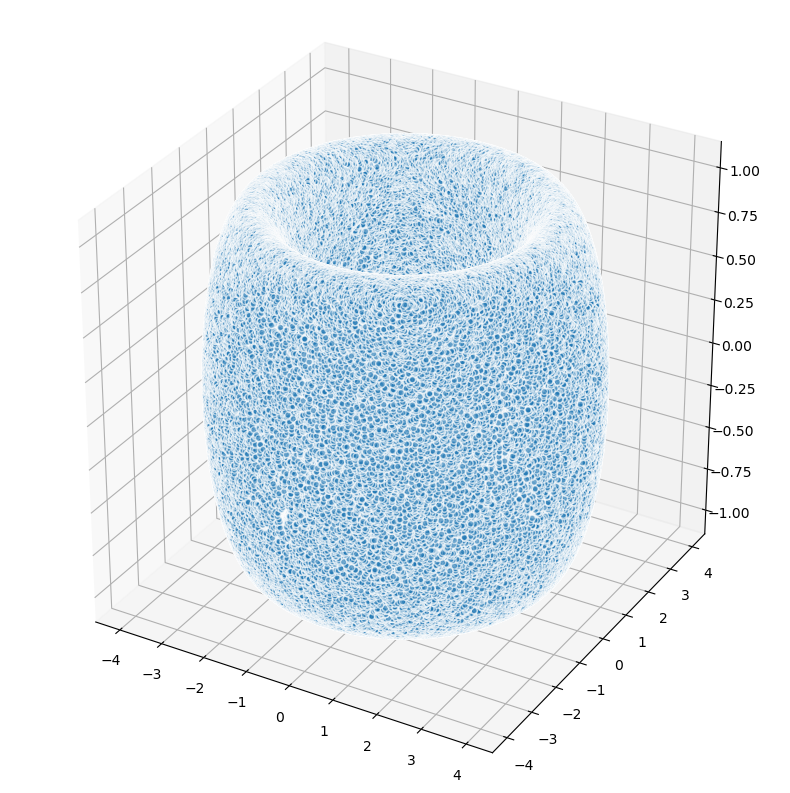

In [15]:
# Define the major and minor radii
R = 3
r = 1

# Define the number of points to generate
num_points = 100000  # Increase the number of points

# Generate random angles theta and phi
theta = 2 * torch.pi * torch.rand(num_points)
phi = 2 * torch.pi * torch.rand(num_points)

# Calculate the Cartesian coordinates
x = (R + r * torch.cos(theta)) * torch.cos(phi)
y = (R + r * torch.cos(theta)) * torch.sin(phi)
z = r * torch.sin(theta)

# Plot the points on the torus
fig = plt.figure(figsize=(10, 10))  # Increase the size of the figure
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.numpy(), y.numpy(), z.numpy(), alpha=0.6, edgecolors='w', s=20)
ax.set_box_aspect([1,1,1])  # Make the aspect ratio equal
plt.show()


# Lie Groups

A Lie group is a group that is also a differentiable manifold, such that the group operations (multiplication and inversion) are smooth. This means that a Lie group is a set that is equipped with a group structure, a manifold structure, and these structures are compatible in the sense that group operations are smooth functions.

Let's break down the definition:

1. **Group Structure:** A group is a set $G$ equipped with an operation $\cdot: G \times G \rightarrow G$ (often written multiplicatively) and an inversion operation $^{-1}: G \rightarrow G$ such that the following axioms are satisfied:

   - **Closure:** For all $a, b \in G$, the result of the operation $a \cdot b$ is also in $G$.
   - **Associativity:** For all $a, b, c \in G$, the equation $(a \cdot b) \cdot c = a \cdot (b \cdot c)$ holds.
   - **Identity element:** There is an element $e \in G$ such that for every element $a \in G$, the equations $e \cdot a = a$ and $a \cdot e = a$ hold.
   - **Inverse element:** For each element $a \in G$, there exists an element $b \in G$ such that $a \cdot b = e$ and $b \cdot a = e$.

2. **Manifold Structure:** As we discussed earlier, a manifold is a topological space that locally resembles Euclidean space. In the case of a Lie group, we require the manifold to be differentiable, meaning that we can do calculus on it. 

3. **Compatibility of Structures:** The group operations (multiplication and inversion) are required to be smooth functions when considered as maps between manifolds. More formally, if we denote the multiplication operation by $\mu: G \times G \rightarrow G$ (so that $\mu(g, h) = g \cdot h$) and the inversion operation by $i: G \rightarrow G$ (so that $i(g) = g^{-1}$), then $\mu$ and $i$ are required to be smooth.

An example of a Lie group is the general linear group $GL(n, \R)$, which consists of all $n \times n$ invertible matrices with real entries. The group operation is matrix multiplication, and the manifold structure comes from identifying each matrix with a point in $\R^{n^2}$. The group operations are smooth functions, so $GL(n, \R)$ is a Lie group.

Another example is the circle $S^1$ with the operation of complex multiplication. Each point on the circle can be identified with a complex number of absolute value 1, and multiplication of such numbers is a smooth operation.

Let's consider the general linear group $GL(2, \R)$ for simplicity. This group consists of all $2 \times 2$ invertible matrices with real entries. A general element of $GL(2, \R)$ can be written as:

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

where $a$, $b$, $c$, and $d$ are real numbers and $ad - bc \neq 0$ (the condition for the matrix to be invertible).

The group operation is matrix multiplication, and the inverse of a matrix is given by:

$$
A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

Now, let's consider some subgroups of $GL(2, \R)$:

1. **Orthogonal Group $O(2)$:** This is the group of $2 \times 2$ matrices that preserve the Euclidean norm, i.e., $AA^T = A^TA = I$. The determinant of such matrices is either 1 or -1. A general element of $O(2)$ can be written as:

    $$
    O = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} \quad \text{or} \quad \begin{bmatrix} \cos \theta & \sin \theta \\ \sin \theta & -\cos \theta \end{bmatrix}
    $$

    where $\theta$ is a real number.

2. **Special Orthogonal Group $SO(2)$:** This is the subgroup of $O(2)$ consisting of matrices with determinant 1. These are rotations in the plane. A general element of $SO(2)$ can be written as:

    $$
    SO = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}
    $$

    where $\theta$ is a real number.

These subgroups are also Lie groups, as they are groups and differentiable manifolds, and the group operations are smooth. They are also examples of compact Lie groups, as they are closed and bounded subsets of $\R^{2 \times 2}$.

Sure, let's go through the matrix multiplication step by step. 

Matrix multiplication is a binary operation that takes a pair of matrices, and produces another matrix. For $2 \times 2$ matrices, the multiplication is defined as follows:

If we have two matrices $A$ and $B$ in $GL(2, \R)$, where

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \quad \text{and} \quad B = \begin{bmatrix} e & f \\ g & h \end{bmatrix}
$$

their product $AB$ is given by

$$
AB = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} e & f \\ g & h \end{bmatrix} = \begin{bmatrix} ae + bg & af + bh \\ ce + dg & cf + dh \end{bmatrix}
$$

This operation is associative, meaning that for any three matrices $A\$, $B$, and $C$ in $GL(2, \R)$, we have $(AB)C = A(BC)$.

**Example:**

Let's consider two specific matrices in $GL(2, \R)$:

$$
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \quad \text{and} \quad B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}
$$

Their product is given by

$$
AB = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} = \begin{bmatrix} 1*5 + 2*7 & 1*6 + 2*8 \\ 3*5 + 4*7 & 3*6 + 4*8 \end{bmatrix} = \begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}
$$

So, the product of $A$ and $B$ is,
$$
\begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}
$$
demonstrating the closure property of the group.


Below, we show that the exponentiated value of simple 2x2 generator matrices is equal to the group of rotation matrices, a simple result with extremely significant implications. 

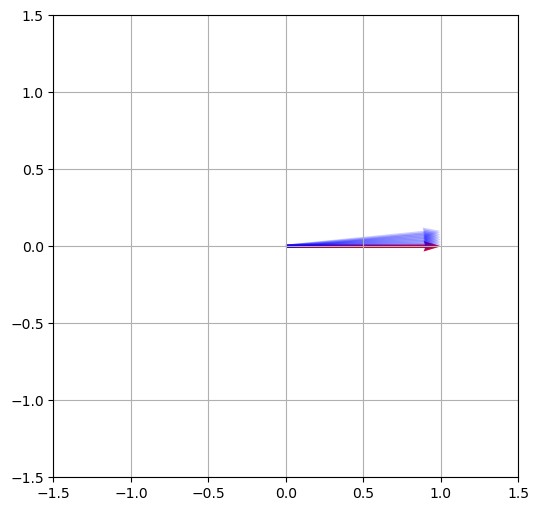

In [16]:
# Define a function to generate a skew-symmetric matrix
def skew_symmetric(theta):
    return theta * torch.tensor(
        [[0, -1], 
         [1, 0]]
        )

# Define a vector
v = torch.tensor([1.0, 0.0])

# Generate a sequence of skew-symmetric matrices and compute their matrix exponentials
thetas = torch.linspace(0, 0.1, 10)
skew_symmetric_matrices = [skew_symmetric(theta) for theta in thetas]
rotation_matrices = [torch.linalg.matrix_exp(X) for X in skew_symmetric_matrices]

# Apply the rotation matrices to the vector
v_rotated = [R @ v for R in rotation_matrices]

# Plot the original and rotated vectors
plt.figure(figsize=(6,6))
plt.quiver(*v, angles='xy', scale_units='xy', scale=1, color='r')
for v_r in v_rotated:
    plt.quiver(*v_r, angles='xy', scale_units='xy', scale=1, color='b', alpha=0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.show()


In this way, we can see that the symmetry groups of transformations of objects in 2D space can be represented by the group of rotation matrices, which can be generated by 2x2 real matrices.

Consider the simplest case of a 2x2 generator matrix, also known as a skew-symmetric matrix:

$$
G = \begin{bmatrix} 0 & -\theta \\ \theta & 0 \end{bmatrix}
$$

where $\theta$ is a scalar. You can observe that this matrix is skew-symmetric, i.e., $G^T = -G$.

Now, let's exponentiate this matrix $G$ using the matrix exponential function $\exp$. The matrix exponential is a power series defined as:

$$
\exp(G) = I + G + \frac{1}{2!} G^2 + \frac{1}{3!} G^3 + \dots = \sum_{k=0}^{\infty} \frac{1}{k!} G^k
$$

We can compute the first few powers of $G$:

$$
G^0 = I, \quad G^1 = G, \quad G^2 = \begin{bmatrix} -\theta^2 & 0 \\ 0 & -\theta^2 \end{bmatrix}, \quad G^3 = -\theta G, \quad G^4 = \theta^2 I, \quad \dots
$$

Now, we plug these matrix powers into the power series and separate the even and odd terms:

$$
\exp(G) = (I + \frac{1}{2!} G^2 + \frac{1}{4!} G^4 + \dots) + (G + \frac{1}{3!} G^3 + \dots) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}
$$

As a result, the matrix exponential of the 2x2 skew-symmetric matrix generates the special orthogonal group $SO(2)$, which is the group of rotation matrices.

These results have significant implications for understanding how to apply Lie groups and matrix exponential to deep learning models, such as Transformer-based architectures. By leveraging the properties of exponentiated generator matrices and understanding the underlying structure, researchers can design models that are more robust and efficient when handling different types of data. Moreover, the idea of matrix exponentiation facilitates a natural way to interpolate between different network parameters when considering weight sharing, encouraging smooth behavior.

### How does this relate to neural networks?

Consider a sequence of input data $x_1, x_2, \dots, x_n$. These data points can be visualized in a high-dimensional space. One of the main components of the Transformer architecture is the self-attention mechanism, which computes an attention score for each element within a sequence. The attention mechanism represents relations between elements in the sequence geometrically, using dot products between those elements in the high-dimensional space. 

By applying continuous transformations to this high-dimensional space, one could potentially extract additional information about the structures embedded in the input data. Lie groups play an important role in this regard. A continuous transformation in a high-dimensional space can be represented as an action of a Lie group on the manifold of data points. In practice, elements of a Lie group are given by the exponentiation of Lie algebra elements, which are closely related to matrix exponentials.

Suppose we have a Lie group in the form of a matrix exponential, as shown before:

$$
\exp(G) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}
$$

Applying this transformation to the input data in the high-dimensional space would result in a new representation of the data points. The transformed data points can be further used as input to a Transformer layer. This transformed representation might allow the attention mechanism to focus on different aspects of the input data and can potentially capture more complex relational structures present.

However, this approach has not yet been fully explored in the Transformer architectures, and most research has focused on finding more efficient ways to apply the attention mechanism, rather than incorporating geometric transformations explicitly. One potential direction for future research could be to consider the effect of applying transformations from special types of Lie groups on attention scores and relevance of input data points, and observe the impact this might have on model performance.

That being said, directly applying Lie group transformations as shown might not be the most natural or efficient way to incorporate the power of Lie groups and their symmetries into Transformer-based architectures. A more elegant approach would be to explore how Lie groups could be integrated into the design of Transformer networks inherently.

One possibility is to incorporate equivariance to Lie group actions into the self-attention mechanism. The principle of equivariance implies that the output of a function should transform in the same way as the input under a given transformation. In this context, it means that the attention mechanism should be designed such that it remains unchanged under the action of a Lie group transformation applied to input data.

To incorporate this idea into the self-attention mechanism, we need to rethink the computation of attention scores. Currently, attention scores are computed using a dot product between the query, key, and value vectors. Instead, we could design an attention mechanism that computes the scores after some consideration of the Lie group transformations.

For example, considering a Lie group of rotations, the design could compute attention scores in a rotation-invariant manner. This would involve redefining the computation of attention scores as the similarity between input element embeddings up to rotations (Lie group actions), rather than solely relying on dot products, which are not rotation-invariant


In this example, we'll use the `torchtext` library to download the Wikitext-2 dataset, which is a collection of Wikipedia articles. We'll preprocess the text data and create a data loader to be used during training. Then, we will build a simple language model using the previously defined rotation-invariant transformer layer and train the model on the dataset.

### 1. First, make sure you have the `torchtext` library installed. You can install it with pip:


In [17]:
!pip install torchtext


### 2. Next, let's download and preprocess the Wikitext-2 dataset:


In [18]:
!pip install portalocker>=2.0.0

In [19]:
# Download the dataset as a zip file
url = 'https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-2-v1.zip'
response = requests.get(url)
zip_content = response.content

# Extract the dataset from the zip file
with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    zip_ref.extractall('wikitext-2')

# Load data from files
with open('wikitext-2/wikitext-2/wiki.train.tokens', 'r', encoding='utf-8') as f:
    train_data_raw = f.read()
with open('wikitext-2/wikitext-2/wiki.valid.tokens', 'r', encoding='utf-8') as f:
    valid_data_raw = f.read()
with open('wikitext-2/wikitext-2/wiki.test.tokens', 'r', encoding='utf-8') as f:
    test_data_raw = f.read()

# Tokenize the data
tokenizer = get_tokenizer('basic_english')
train_iter = tokenizer(train_data_raw)
valid_iter = tokenizer(valid_data_raw)
test_iter = tokenizer(test_data_raw)

# Create the vocabulary
vocab = build_vocab_from_iterator(train_iter, specials=['<unk>', '<pad>', '<bos>', '<eos>'])
vocab.set_default_index(vocab['<unk>'])

# Preprocess the data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def preprocess_data(data_iter, vocab, device):
    tensor_data = torch.tensor([vocab[token] for token in data_iter], dtype=torch.long, device=device)  # Change dtype to torch.long
    # Insert <bos> and <eos> tokens to the beginning and end of the sequence
    yield torch.cat([torch.tensor([vocab['<bos>']], device=device), tensor_data, torch.tensor([vocab['<eos>']], device=device)]).long()  # Add .long() here

train_data = list(preprocess_data(train_iter, vocab, device))
valid_data = list(preprocess_data(valid_iter, vocab, device))
test_data = list(preprocess_data(test_iter, vocab, device))




### 3. Create a data loader for the language modeling task:


In [20]:
def batchify(data, batch_size):
    total_seq_len = sum([len(x) for x in data])
    num_batch_elements = total_seq_len // batch_size
    
    # Concatenate and reshape data into batch_size columns
    batched_data = torch.cat(data)
    batched_data = batched_data.narrow(0, 0, num_batch_elements * batch_size)
    batched_data = batched_data.view(batch_size, -1).t().contiguous()
    return batched_data

batch_size = 64
eval_batch_size = 128

train_loader = DataLoader(batchify(train_data, batch_size), batch_size=batch_size)
valid_loader = DataLoader(batchify(valid_data, eval_batch_size), batch_size=eval_batch_size)
test_loader = DataLoader(batchify(test_data, eval_batch_size), batch_size=eval_batch_size)



### 4. Build a simple language model using the rotation-invariant transformer layer:


In [21]:
class RotationInvariantMultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        
        self.query_linear = nn.Linear(d_model, d_model)
        self.key_linear = nn.Linear(d_model, d_model)
        self.value_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def euclidean_distance(self, x, y):
        return torch.sum((x - y) ** 2, dim=-1)

    def forward(self, x):
        batch_size = x.size(0)
        
        query = self.query_linear(x)
        key = self.key_linear(x)
        value = self.value_linear(x)

        query = query.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2).unsqueeze(3)
        key = key.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2).unsqueeze(2)
        value = value.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2).unsqueeze(2)
        
        scores = self.euclidean_distance(query, key)
        scores = - torch.sqrt(scores)
        
        weights = F.softmax(scores, dim=-1)

        print(f"query shape: {query.shape}")  # Add this line
        print(f"key shape: {key.shape}")  # Add this line
        print(f"value shape: {value.shape}")  # Add this line
        print(f"weights shape: {weights.shape}")  # Add this line
        
        attention = torch.einsum("bnqd,bnqd->bnqd", weights, value).contiguous()

        print(f"attention shape: {attention.shape}")  # Add this line

        attention = attention.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        return self.out_linear(attention)

class RotationInvariantTransformerLayer(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.multi_head_attention = RotationInvariantMultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, 4 * d_model),
            nn.ReLU(),
            nn.Linear(4 * d_model, d_model)
        )

    def forward(self, x):
        # Self-Attnetion
        attn_out = self.multi_head_attention(x)
        x = self.norm1(attn_out + x)
        x = self.dropout(x)
        
        # Position-wise Feedforward
        ff_out = self.feed_forward(x)
        x = self.norm2(ff_out + x)
        x = self.dropout(x)
        
        return x

class RotationInvariantTransformer(nn.Module):
    def __init__(self, input_dim, d_model, num_heads, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, d_model)
        self.layers = nn.ModuleList([RotationInvariantTransformerLayer(d_model, num_heads) for _ in range(num_layers)])

    def forward(self, x):
        x = self.embedding(x)
        for layer in self.layers:
            x = layer(x)
        return x
    
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, num_layers, seq_len):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, d_model)
        self.transformer = RotationInvariantTransformer(input_dim=d_model, d_model=d_model, num_heads=num_heads, num_layers=num_layers)
        self.fc = nn.Linear(d_model, vocab_size)
        self.seq_len = seq_len

    def forward(self, x):
        print(f"x dimensions in LanguageModel: {x.shape}")
        embedded = self.embedding(x).to(torch.long)
        transformer_out = self.transformer(embedded.view(-1, d_model))
        logits = self.fc(transformer_out)
        return logits

vocab_size = len(vocab)
d_model = 512
num_heads = 8
num_layers = 6
seq_len = 35

model = LanguageModel(vocab_size, d_model, num_heads, num_layers, seq_len).to(device)



### 5. Now, let's train the model:

In [22]:
def train(model, iterator, optimizer, criterion):
    model.train()
    running_loss = 0

    for batch in iterator:
        optimizer.zero_grad()
        input_data = batch[:-1, :]
        target_data = batch[1:, :]
        output = model(input_data)
        loss = criterion(output.view(-1, output.shape[-1]), target_data.view(-1))
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    return running_loss / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()
    running_loss = 0

    with torch.no_grad():
        for batch in iterator:
            input_data = batch[:-1, :]
            target_data = batch[1:, :]
            output = model(input_data)
            loss = criterion(output.view(-1, output.shape[-1]), target_data.view(-1))
            running_loss += loss.item()
    
    return running_loss / len(iterator)

epochs = 10
lr = 0.001

optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer, criterion)
    valid_loss = evaluate(model, valid_loader, criterion)
    print(f'Epoch: {epoch}, Train loss: {train_loss:.3f}, Validation loss: {valid_loss:.3f}')


x dimensions in LanguageModel: torch.Size([63, 64])


RuntimeError: CUDA error: CUBLAS_STATUS_NOT_INITIALIZED when calling `cublasCreate(handle)`



6. Lastly, we'll implement a `generate()` method to generate new sequences using the language model:

In [ ]:

def generate(model, start_text, generate_len=30, temperature=0.8):
    model.eval()
    input_data = torch.tensor([vocab[token] for token in tokenizer(start_text)], dtype=torch.long, device=device).unsqueeze(1)
    
    hidden = None
    generated_text = start_text

    with torch.no_grad():
        for _ in range(generate_len):
            output = model(input_data)
            output = output / temperature
            output = torch.exp(output)
            probs = output[-1, :].squeeze().cpu()

            # Sample from the output distribution
            next_token_idx = torch.multinomial(probs, 1).item()
            next_token = vocab.itos[next_token_idx]

            # Append the generated token to the existing sequence and update input data
            generated_text += " " + next_token
            input_data = torch.cat([input_data, torch.tensor([[next_token_idx]], device=device)], dim=0)

    return generated_text

print(generate(model, "The history of", generate_len=30))




This example code demonstrates how to train a language model using a custom rotation-invariant transformer on the Wikitext-2 dataset and generate new text sequences using the trained model. Keep in mind that this model is relatively simplistic and has not been fine-tuned for optimal performance. Hyperparameter adjustments or deeper exploration of structures related to transformation-equivariant attention may be required to achieve high-quality results.

In [ ]:
import platform
print(f"OS: {platform.system()} {platform.release()}")
print(f"Python: {platform.python_version()}")

In [ ]:
import torch
print(f"PyTorch: {torch.__version__}")
print(f"CUDA version: {torch.version.cuda}")